In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import colormaps
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout 

mon_data=pd.read_csv('mushrooms.csv')#importantation du fichier csv
print(mon_data.head(2))
print(mon_data.shape )# taille du dataframe
print(mon_data.info())
print(mon_data.describe())



  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  

[2 rows x 23 columns]
(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 

In [4]:
#extraction des itermes des colonnes avec liste
indixe=list(mon_data.columns)
print(indixe)


['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [5]:
#vérification des valeur manquant.
data_manquant=mon_data.isnull().sum()
print(data_manquant)#vérification reussi pas de données manquantes.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
#visualisation des donnnées  catégorielles avec seaborn et visualisation
#création
import seaborn as sns
df=pd.DataFrame(mon_data)
#print(df.columns)
sns.pairplot(data=df,hue='Survived',diag_kind="hist",palette="Paired")


In [7]:
#matrice de correlation
df=pd.DataFrame(mon_data)
df_encoder=LabelEncoder()
df_encoded = df.copy()
for enco in df.columns:
     df_encoded[enco] = df_encoder.fit_transform(df[enco])
#print(df_encoded.head())

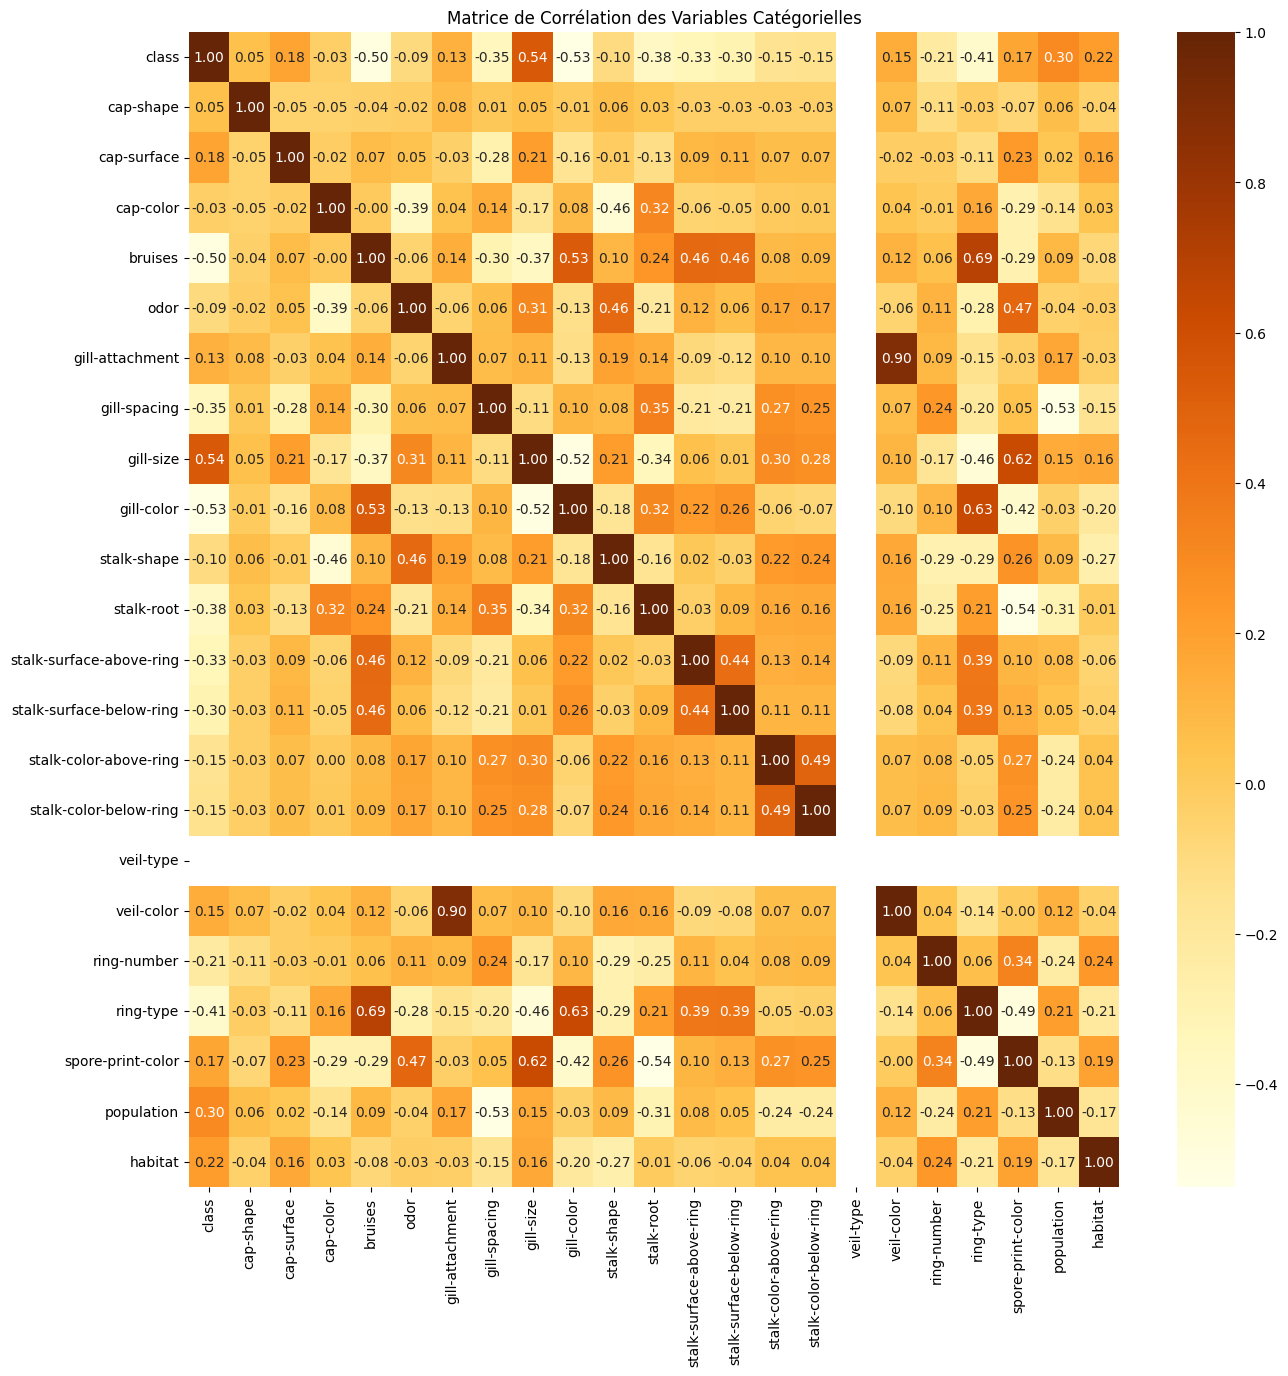

In [12]:
matrice_corelation=df_encoded.corr()
plt.figure(figsize=(15,15))
sns.heatmap(matrice_corelation,annot=True, cmap='YlOrBr', fmt='.2f' )
plt.title("Matrice de Corrélation des Variables Catégorielles")
#plt.savefig("matrice_corelation.png")
plt.show()

In [16]:
# Séparation des variables explicatives (X) et de la variable cible (y)
label_encoder = LabelEncoder()
df_encoded['class'] = label_encoder.fit_transform(df['class'])


x = df_encoded.drop('class', axis=1).values  # Toutes les colonnes sauf 'class
y = df_encoded['class'].values  # séparation de la colonne cible

#print("separation des valeurs explicatives",x)
#print("prediction des valeurs predictives",y)

# entrainement des valeurs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
print(f"x_train,",x_train)
print(f"x_test ", x_test)

x_train, [[2 3 9 ... 1 5 1]
 [5 2 5 ... 7 1 6]
 [0 2 3 ... 7 3 1]
 ...
 [2 0 8 ... 2 0 1]
 [5 0 3 ... 3 5 0]
 [2 0 4 ... 3 4 0]]
x_test  [[5 3 3 ... 1 5 0]
 [5 2 8 ... 3 3 0]
 [5 0 8 ... 3 3 1]
 ...
 [5 0 2 ... 3 5 0]
 [2 2 4 ... 2 3 1]
 [2 2 3 ... 1 3 1]]


In [17]:
# Construction du modèle
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Couche cachée avec 64 neurones
model.add(Dropout(0.5))  # Ajout d'une couche de Dropout avec un taux de 50%
model.add(Dense(16,activation='relu'))#troixième couche avec 16 neuronnes
model.add(Dropout(0.5))  # Ajout d'une couche de Dropout avec un taux de 50%
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie pour classification binaire
model.summary()

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-15 15:04:06.276084: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,529 (9.88 KB)

 Trainable params: 2,529 (9.88 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6192 - loss: 0.6448 - val_accuracy: 0.9280 - val_loss: 0.2097
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9123 - loss: 0.2624 - val_accuracy: 0.9692 - val_loss: 0.1101
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9526 - loss: 0.1641 - val_accuracy: 0.9797 - val_loss: 0.0613
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9621 - loss: 0.1190 - val_accuracy: 0.9865 - val_loss: 0.0343
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.9938 - val_loss: 0.0208
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9801 - loss: 0.0590 - val_accuracy: 0.9957 - val_loss: 0.0118
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9994 - val_loss: 0.0071
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9903 - loss: 0.0359 - val_a

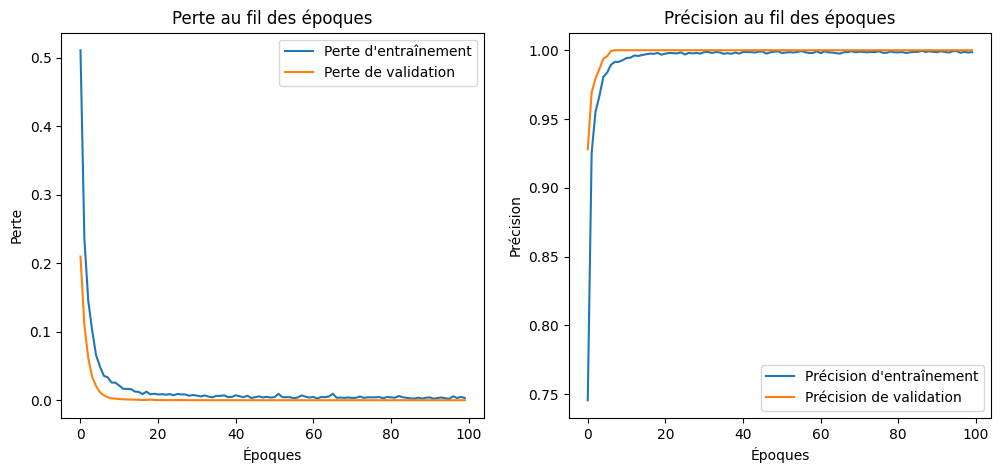

In [20]:
# Visualisation de l'historique d'entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


# Précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [21]:
#Évaluation finale sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte finale sur les données de test : {loss}")
print(f"Précision finale sur les données de test : {accuracy}")

# Prédiction sur l'ensemble de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Vérification des performances
from sklearn.metrics import classification_report, confusion_matrix

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
model.save("mon_modele.h5")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.4069e-07
Perte finale sur les données de test : 7.839801128284307e-07
Précision finale sur les données de test : 1.0
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step



Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Matrice de confusion :
[[842   0]
 [  0 783]]


In [22]:
#Auteur:Ibrahim amza coulibaly 3A MAM.